# Méthode de fouille sur les haies

On va chercher ici à appliquer les méthodes de fouilles de données vu en FDEC, à commencer par le hierarchical clustering. 

Le but est donc de tester un peu tout ce qu'on peut pour obtenir un truc pertinent à la fin.

In [234]:
# importation des packages requis
%matplotlib inline
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering

# importations des données et définition des cluters

In [235]:
haie_classifiees = pd.read_csv('5_sf_haies_classfiees.csv')

# haie_vraiment_fusionnees = pd.read_csv('haie_vraiment_fusionnees.csv')
# haie_non_fusionnees = pd.read_csv('haie_non_fusionnees.csv')

In [236]:
haie_classifiees = haie_classifiees.drop(['Unnamed: 0','Unnamed: 0.1','type', 'bool1', 'bool2','typeH', 'XG', 'YG', 'id'], axis = 1)

In [237]:
import scipy.cluster.hierarchy as shc
def clustering(data, variables, n_clusters=3, link='ward'):
    '''fonction qui fait le AgglomerativeClustering avec les parametres definis + affiche les clusters grâce à seaborn
    link possible : ward, complete, average, single
    variables : liste des variables à utiliser pour faire nos clusters
    '''

    clust = AgglomerativeClustering(n_clusters=n_clusters, linkage=link)
    X = data.copy()
    X = StandardScaler().fit_transform(X)
    X = pd.DataFrame(X, columns = data.columns)
    # Prédire les clusters pour chaque observation
    labels = clust.fit_predict(X[variables])

    # Ajouter les prédictions comme nouvelle colonne à votre dataframe
    data['cluster'] = labels

    clusters_df = []
    for i in set(data['cluster']):
        clusters_df.append(data[data['cluster'] == i])


    # cette partie est commenté car souvent elle génère trop d'appel récusif et cela renvoie alors une erreure
    # Afficher le dendrogramme
    # plt.figure(figsize=(20, 10))
    # dend = shc.dendrogram(shc.linkage(data[variables], method=link), labels=data.index)
    # plt.title('Dendrogramme')
    # plt.xlabel('Observations')
    # plt.ylabel('Distance')

    sns.relplot(data=data, x='X1', y='Y1', hue='cluster', palette='colorblind', height=20, aspect=1)
    return data, clusters_df


In [238]:
sols = ['ville'	,'pastures'	,'complex_cult'	,'natural_vegetation'	,'non_irrigated']

# Etude et visualisation des clusters

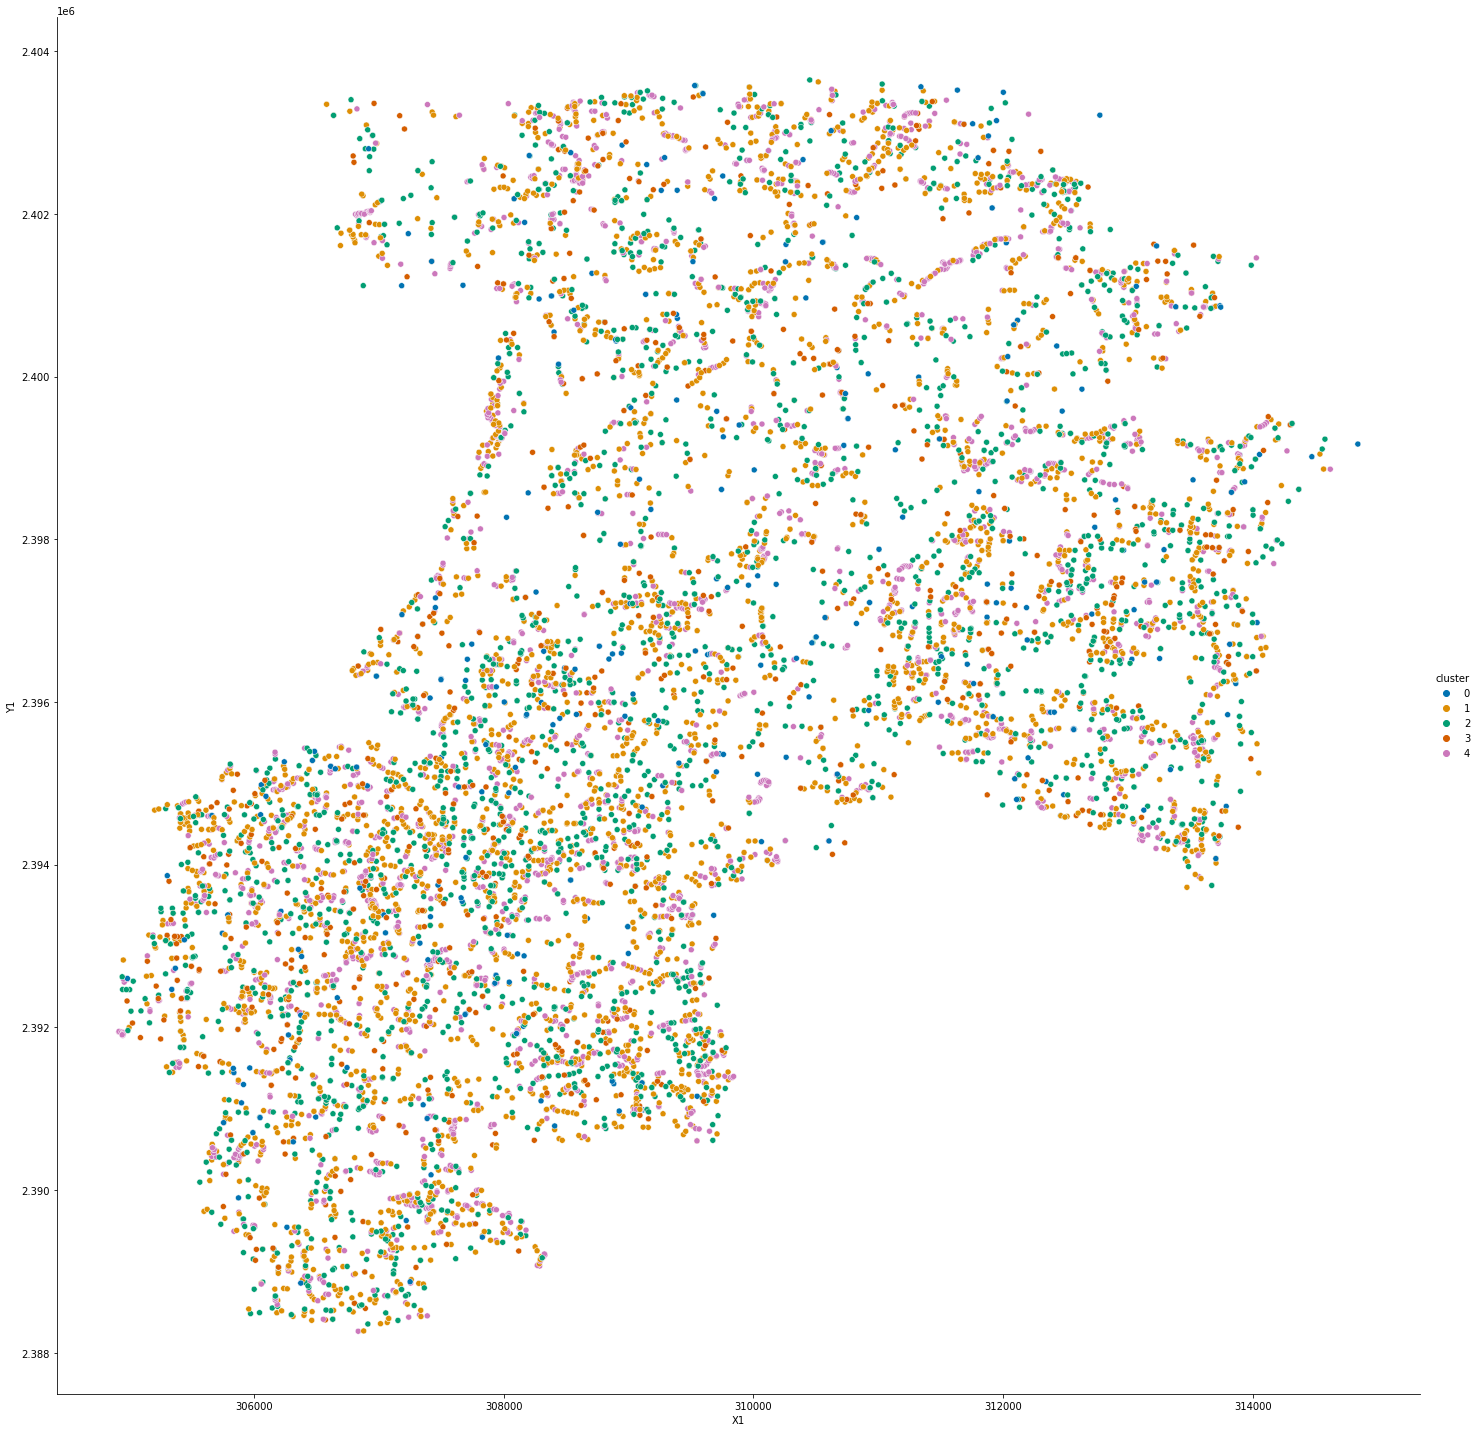

In [239]:
haie_cluster, clusters = clustering( haie_classifiees, n_clusters = 5, link = 'ward', variables = ['Lng'])

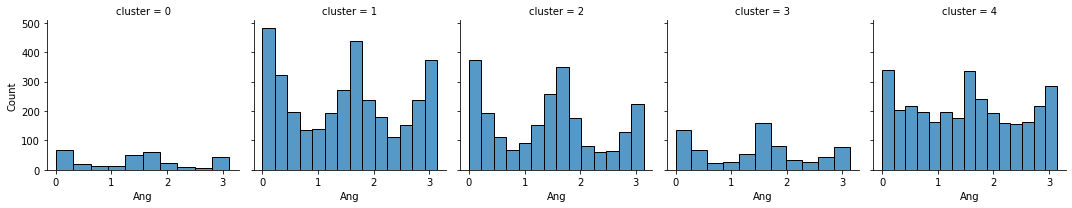

In [240]:
g = sns.FacetGrid(haie_cluster, col="cluster")
g.map(sns.histplot, "Ang")

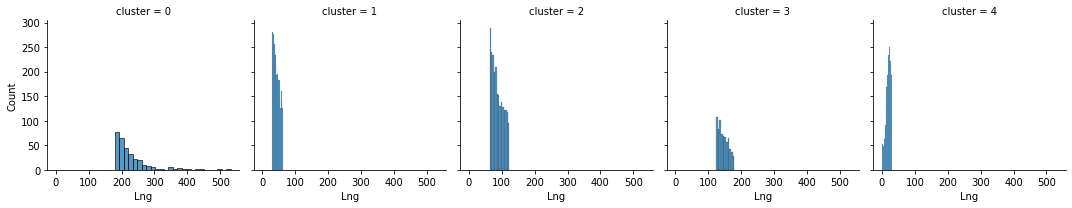

In [241]:
g = sns.FacetGrid(haie_cluster, col="cluster")
g.map(sns.histplot, "Lng")

Ok faut vraiment pouvoir visualiser les haies sur les parcelles direct ça donnera vraiment bcp plus d'infos. 

Là de ce que je pourrais émettre comme hypothèse avec les longueurs des haies : 
- les haies courtes (cluster 4 )ont pas l'air d'être créer spécialement avec un angle dédiée, mais plutôt en mode bouche trou parce qu'on en avait besoin à un endroit.

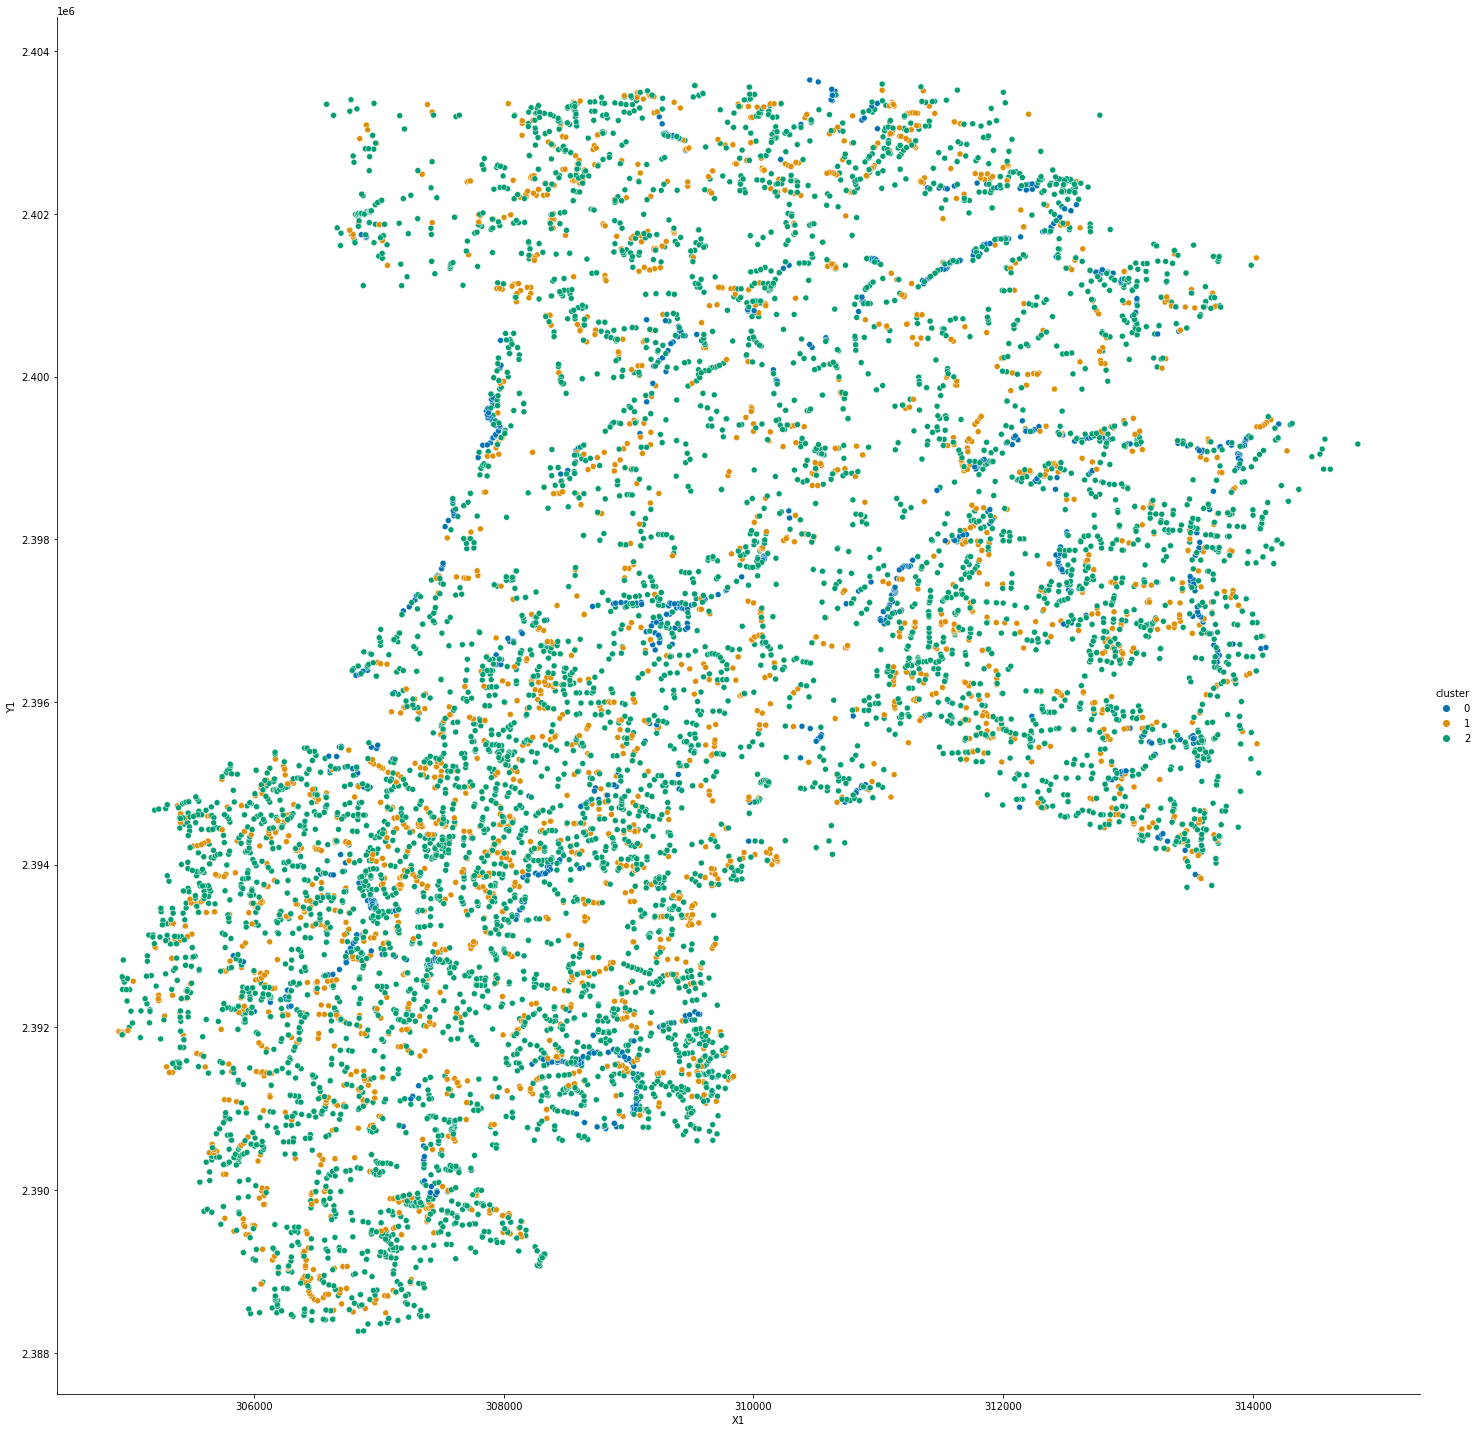

In [242]:
haie_cluster, clusters = clustering( haie_classifiees, n_clusters = 3, link = 'ward', variables = ['proche route','proche canal'])

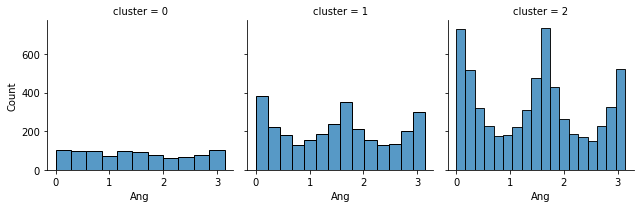

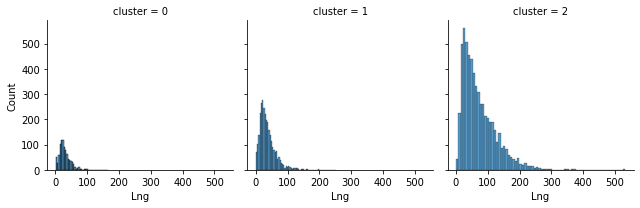

In [243]:
h = sns.FacetGrid(haie_cluster, col="cluster")
h.map(sns.histplot, "Ang")
h = sns.FacetGrid(haie_cluster, col="cluster")
h.map(sns.histplot, "Lng")

*   cluster 0 = proche canal
*   cluster 1 = proche route
*   cluster 2 = aucun des 3
*   cluster 3 = perp routes





Etude du cluser 1 (donc proche canal) : 

Ce sont des haies plus courtes en moyenne que le reste (2,9 m en moyenne vs 3,9 en moyenne pour toute les haies). Pas d'angle particulier. Ce sont des haies qui se trouvent quasi exclusivement sur des sols de paturages ou de cultivation complexe.

Regardez les haies qui sont ni à l'horizontal ni à la vertical, elles seraient pas de longueur plus petite ou un bail comme ça ? 

In [244]:
proche_canal = clusters[0].copy()

In [245]:
proche_canal.describe()

,row,col,X1,Y1,X2,Y2,Lng,Ang,proche route,proche canal,perp route,perp canal,paral route,paral canal,ville,pastures,complex_cult,natural_vegetation,non_irrigated,cluster
count,935.000000,935.000000,935.000000,9.350000e+02,935.000000,9.350000e+02,935.000000,935.000000,935.000000,935.0,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.000000,935.0
mean,6.070588,4.659893,310080.122333,2.397040e+06,310088.553319,2.397038e+06,29.299736,1.511960,0.352941,1.0,0.150802,0.306952,0.182888,0.608556,0.002139,0.432086,0.421390,0.019251,0.164706,0.0
std,3.528310,2.306273,2253.345781,3.511181e+03,2254.402942,3.511987e+03,18.362042,0.941275,0.478140,0.0,0.358047,0.461476,0.386781,0.488335,0.046225,0.495631,0.494046,0.137481,0.371113,0.0
min,0.000000,0.000000,305837.752222,2.389685e+06,305839.464286,2.389662e+06,0.425999,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,3.000000,3.000000,308247.665488,2.393982e+06,308260.941760,2.393981e+06,17.044597,0.693196,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,6.000000,4.000000,309474.891905,2.397197e+06,309473.716513,2.397191e+06,25.462832,1.465920,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,7.000000,312124.472676,2.399575e+06,312111.191396,2.399605e+06,38.016683,2.317673,1.000000,1.0,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.0
max,13.000000,9.000000,314313.218374,2.403645e+06,314318.041766,2.403622e+06,164.025677,3.141581,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


In [246]:
proche_route = clusters[1].copy()

In [247]:
proche_route.describe()

,row,col,X1,Y1,X2,Y2,Lng,Ang,proche route,proche canal,perp route,perp canal,paral route,paral canal,ville,pastures,complex_cult,natural_vegetation,non_irrigated,cluster
count,2976.000000,2976.000000,2976.000000,2.976000e+03,2976.000000,2.976000e+03,2976.000000,2976.000000,2976.0,2976.0,2976.000000,2976.0,2976.000000,2976.0,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.0
mean,7.228495,3.659274,309073.633199,2.395848e+06,309088.550946,2.395848e+06,37.003474,1.510305,1.0,0.0,0.432124,0.0,0.497648,0.0,0.021169,0.151210,0.584677,0.031250,0.263105,1.0
std,3.770234,2.271971,2260.669063,3.803857e+03,2261.449832,3.803503e+03,26.665510,0.965220,0.0,0.0,0.495455,0.0,0.500078,0.0,0.143973,0.358313,0.492860,0.174022,0.440393,0.0
min,0.000000,0.000000,304920.062429,2.388490e+06,304920.062429,2.388425e+06,0.471366,0.000000,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
25%,4.000000,2.000000,307242.961727,2.393089e+06,307259.529255,2.393094e+06,19.178422,0.607071,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.0
50%,8.000000,3.000000,308752.859297,2.395181e+06,308767.217313,2.395188e+06,30.726996,1.570758,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.0
75%,10.000000,5.000000,310730.116858,2.398667e+06,310742.695258,2.398686e+06,47.534760,2.280259,1.0,0.0,1.000000,0.0,1.000000,0.0,0.000000,0.000000,1.000000,0.000000,1.000000,1.0
max,13.000000,9.000000,314365.811558,2.403577e+06,314393.654822,2.403519e+06,250.953061,3.141588,1.0,0.0,1.000000,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.0


In [248]:
haie_proche_rien = clusters[2].copy()

In [249]:
haie_proche_rien.describe()

,row,col,X1,Y1,X2,Y2,Lng,Ang,proche route,proche canal,perp route,perp canal,paral route,paral canal,ville,pastures,complex_cult,natural_vegetation,non_irrigated,cluster
count,6168.000000,6168.000000,6168.000000,6.168000e+03,6168.000000,6.168000e+03,6168.000000,6168.000000,6168.0,6168.0,6168.0,6168.0,6168.0,6168.0,6168.000000,6168.000000,6168.000000,6168.000000,6168.000000,6168.0
mean,7.127594,3.815013,309236.954632,2.395937e+06,309255.965630,2.395936e+06,73.509272,1.460243,0.0,0.0,0.0,0.0,0.0,0.0,0.009079,0.173800,0.560473,0.023833,0.129702,2.0
std,3.794301,2.371727,2344.687971,3.845797e+03,2343.388967,3.844746e+03,54.510336,0.962873,0.0,0.0,0.0,0.0,0.0,0.0,0.094859,0.378968,0.496370,0.152540,0.336002,0.0
min,0.000000,0.000000,304946.999101,2.388265e+06,304853.843581,2.388265e+06,0.307959,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
25%,4.000000,2.000000,307412.849647,2.393094e+06,307416.687511,2.393077e+06,32.915024,0.505810,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.0
50%,8.000000,3.000000,308883.626529,2.395470e+06,308897.609809,2.395470e+06,58.782037,1.549851,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,2.0
75%,10.000000,6.000000,311132.717795,2.398792e+06,311139.799451,2.398793e+06,101.037115,2.127333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,2.0
max,13.000000,9.000000,314838.624934,2.403595e+06,314651.064422,2.403611e+06,531.865341,3.141590,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,2.0


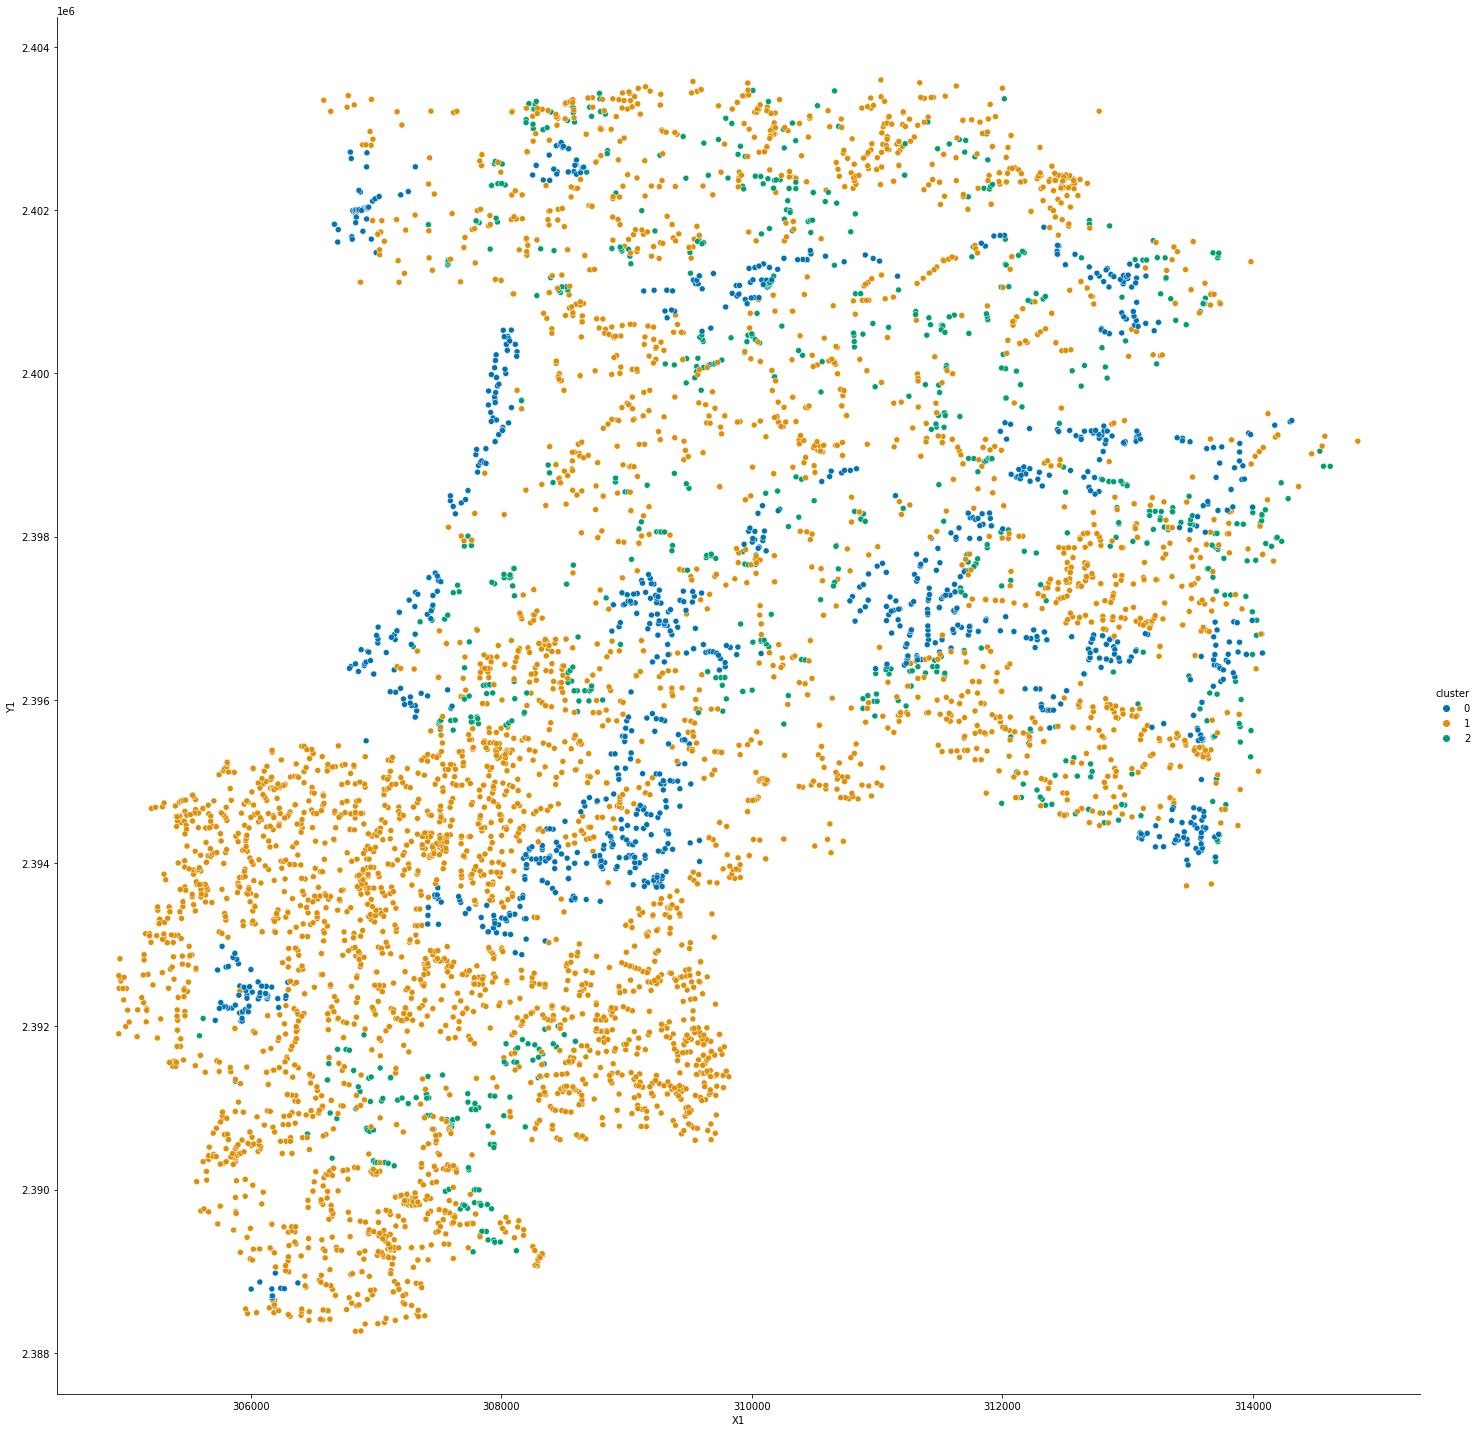

In [250]:
haie_cluster, clusters = clustering( haie_proche_rien, n_clusters = 3, link = 'ward', variables = ['Lng','Ang','ville', 'pastures', 'complex_cult',
       'natural_vegetation', 'non_irrigated'])

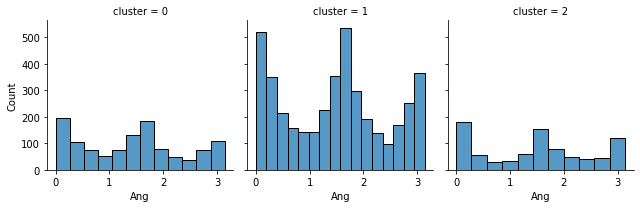

In [251]:
j = sns.FacetGrid(haie_cluster, col="cluster")
j.map(sns.histplot, "Ang")

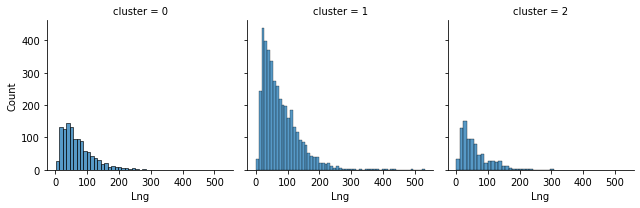

In [252]:
j = sns.FacetGrid(haie_cluster, col="cluster")
j.map(sns.histplot, "Lng")

In [253]:
len(clusters[1])/len(haie_proche_rien)

0.6733138780804151

In [254]:
clusters[0].describe()

,row,col,X1,Y1,X2,Y2,Lng,Ang,proche route,proche canal,perp route,perp canal,paral route,paral canal,ville,pastures,complex_cult,natural_vegetation,non_irrigated,cluster
count,1165.000000,1165.000000,1165.000000,1.165000e+03,1165.000000,1.165000e+03,1165.000000,1165.000000,1165.0,1165.0,1165.0,1165.0,1165.0,1165.0,1165.0,1165.000000,1165.000000,1165.000000,1165.000000,1165.0
mean,6.150215,4.657511,310056.908747,2.396950e+06,310078.987742,2.396948e+06,69.993913,1.405663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.882403,0.046352,0.126180,0.001717,0.0
std,2.868946,2.341605,2336.983453,2.859444e+03,2334.150232,2.858049e+03,48.199001,0.942987,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.322268,0.210336,0.332195,0.041416,0.0
min,0.000000,0.000000,305716.875454,2.388672e+06,305588.218846,2.388674e+06,1.374784,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,3.000000,308224.978752,2.394421e+06,308286.157760,2.394428e+06,34.269647,0.463632,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
50%,6.000000,4.000000,309449.498273,2.396799e+06,309469.408065,2.396815e+06,58.325539,1.496220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
75%,9.000000,7.000000,312300.610820,2.398928e+06,312311.967268,2.398935e+06,92.936742,1.977113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,0.0
max,13.000000,9.000000,314311.928038,2.402828e+06,314240.688870,2.402886e+06,283.384801,3.141589,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,0.0


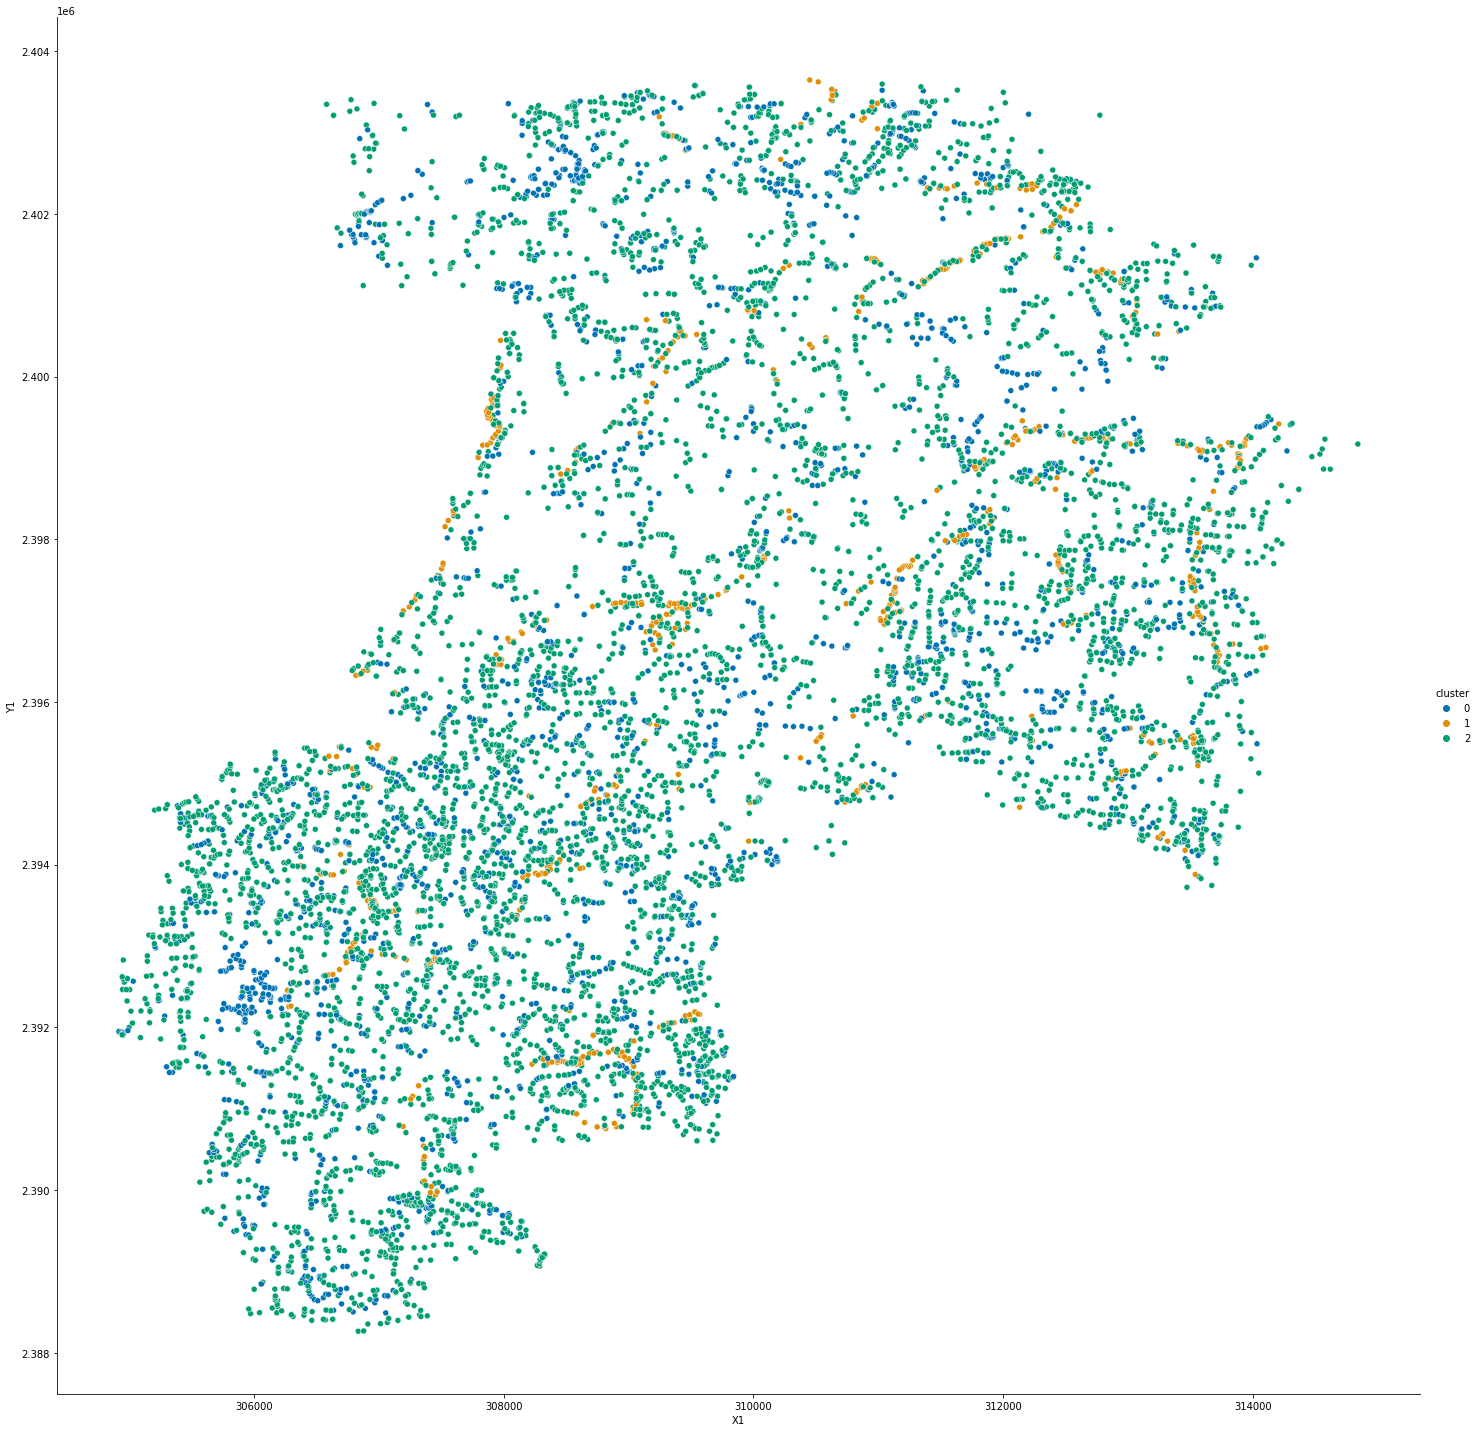

In [255]:
haie_cluster, clusters = clustering( haie_classifiees, n_clusters = 3, link = 'ward', variables = ['Lng', 'Ang',
       'proche route', 'proche canal', 'perp route', 'perp canal',
       'paral route', 'paral canal', 'ville', 'pastures', 'complex_cult',
       'natural_vegetation', 'non_irrigated'])

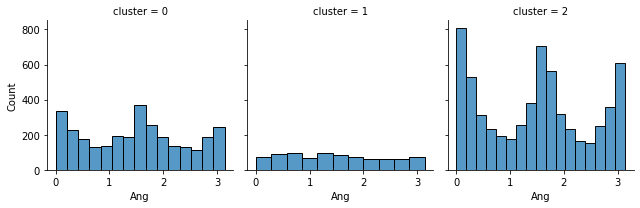

In [256]:
j = sns.FacetGrid(haie_cluster, col="cluster")
j.map(sns.histplot, "Ang")

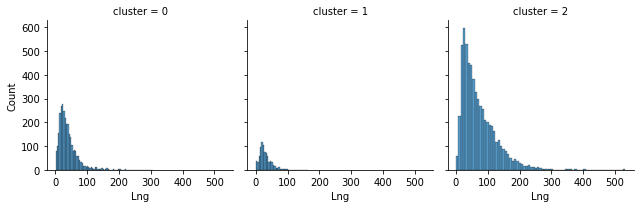

In [257]:
j = sns.FacetGrid(haie_cluster, col="cluster")
j.map(sns.histplot, "Lng")

In [262]:
clusters[2].describe()

,row,col,X1,Y1,X2,Y2,Lng,Ang,proche route,proche canal,perp route,perp canal,paral route,paral canal,ville,pastures,complex_cult,natural_vegetation,non_irrigated,cluster
count,6241.000000,6241.000000,6241.000000,6.241000e+03,6241.000000,6.241000e+03,6241.000000,6241.000000,6241.000000,6241.000000,6241.000000,6241.0,6241.000000,6241.0,6241.0,6241.000000,6241.000000,6241.0,6241.000000,6241.0
mean,7.203012,3.833360,309253.394676,2.395861e+06,309271.815428,2.395859e+06,71.985156,1.473196,0.035731,0.012017,0.001282,0.0,0.001602,0.0,0.0,0.178177,0.578914,0.0,0.137478,2.0
std,3.761175,2.360896,2337.422815,3.816327e+03,2336.134366,3.815324e+03,54.264233,0.984421,0.185635,0.108972,0.035783,0.0,0.040000,0.0,0.0,0.382692,0.493773,0.0,0.344379,0.0
min,0.000000,0.000000,304920.062429,2.388265e+06,304853.843581,2.388265e+06,0.307959,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.0
25%,4.000000,2.000000,307432.530623,2.393105e+06,307444.437951,2.393086e+06,31.498658,0.486779,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,2.0
50%,8.000000,3.000000,308921.905825,2.395383e+06,308934.509921,2.395380e+06,57.135792,1.554705,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,2.0
75%,10.000000,6.000000,311103.954755,2.398612e+06,311120.563043,2.398595e+06,99.285733,2.199564,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,1.000000,0.0,0.000000,2.0
max,13.000000,9.000000,314838.624934,2.403595e+06,314651.064422,2.403611e+06,531.865341,3.141590,1.000000,1.000000,1.000000,0.0,1.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,2.0


In [259]:
clusters[0].describe()

,row,col,X1,Y1,X2,Y2,Lng,Ang,proche route,proche canal,perp route,perp canal,paral route,paral canal,ville,pastures,complex_cult,natural_vegetation,non_irrigated,cluster
count,2998.000000,2998.000000,2998.000000,2.998000e+03,2998.000000,2.998000e+03,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.0
mean,7.064043,3.622081,309038.719840,2.396015e+06,309054.390451,2.396016e+06,38.927576,1.491534,0.929620,0.006671,0.430287,0.002001,0.496331,0.003336,0.040360,0.145097,0.542695,0.086057,0.245163,0.0
std,3.839963,2.295984,2276.040869,3.860662e+03,2276.798595,3.860246e+03,29.867213,0.932354,0.255829,0.081418,0.495199,0.044699,0.500070,0.057667,0.196836,0.352257,0.498257,0.280496,0.430256,0.0
min,0.000000,0.000000,304921.657117,2.388490e+06,304920.062429,2.388425e+06,0.471366,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,4.000000,2.000000,307170.961823,2.393066e+06,307183.810975,2.393059e+06,19.568024,0.641029,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,8.000000,3.000000,308675.464080,2.395439e+06,308697.590848,2.395407e+06,31.721859,1.561463,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,10.000000,5.000000,310762.227538,2.399003e+06,310781.445570,2.398999e+06,49.499118,2.182769,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
max,13.000000,9.000000,314365.811558,2.403577e+06,314393.654822,2.403519e+06,307.902319,3.141589,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0
